<a href="https://colab.research.google.com/github/anushkayeole24/CodeClause/blob/main/SpeechRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Audio

In [42]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [43]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [44]:
!pip install q kaggle

In [45]:
import pandas as pd
import numpy as np
import glob
import soundfile
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as mplt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [26]:
!mkdir ~/.kaggle

In [28]:
!cp /content/kaggle.json ~/.kaggle/

In [31]:
! chmod 600 /content/kaggle.json

In [32]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
! unzip /content/toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [46]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [47]:
len(paths)

2800

In [48]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_search_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_juice_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_thin_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_tell_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_dime_disgust.wav']

In [49]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,disgust
1,/content/tess toronto emotional speech set dat...,disgust
2,/content/tess toronto emotional speech set dat...,disgust
3,/content/tess toronto emotional speech set dat...,disgust
4,/content/tess toronto emotional speech set dat...,disgust


In [50]:
df['label'].value_counts()

disgust    400
ps         400
sad        400
angry      400
happy      400
neutral    400
fear       400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

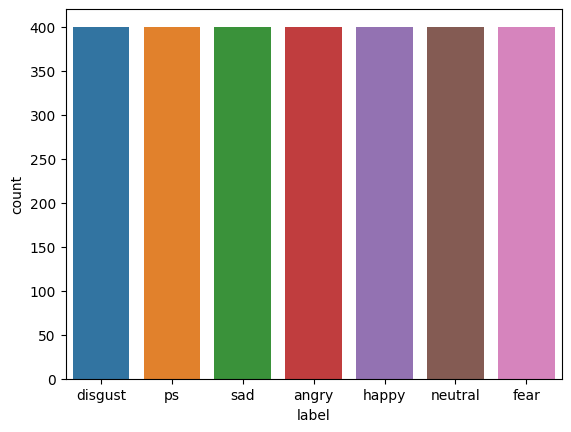

In [51]:
sns.countplot(data=df, x='label')

In [52]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

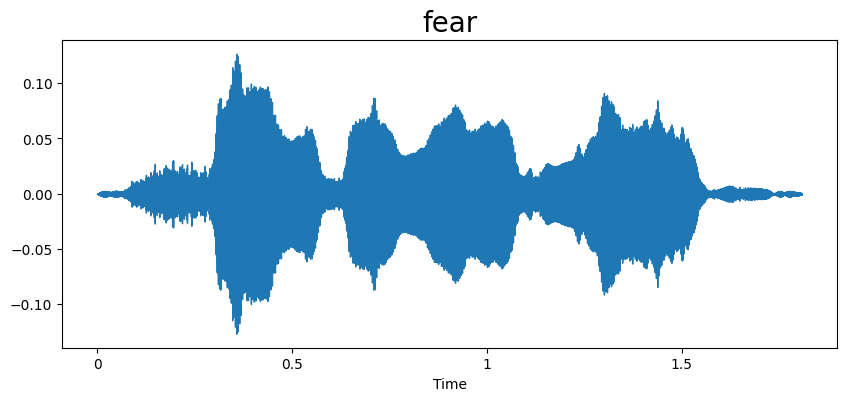

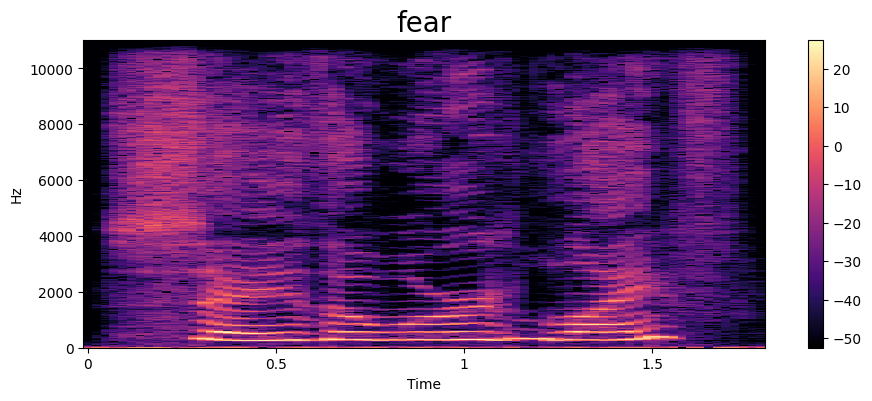

In [53]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

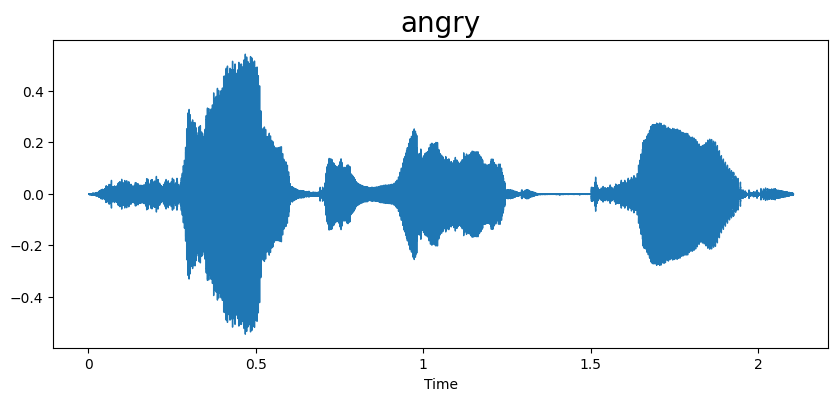

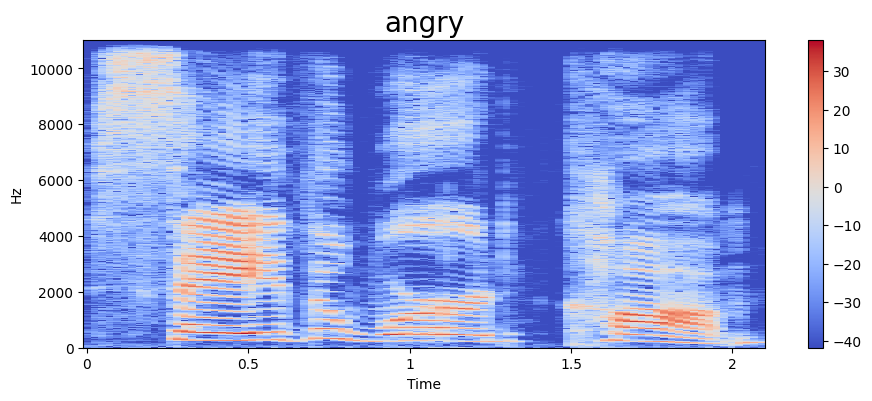

In [54]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

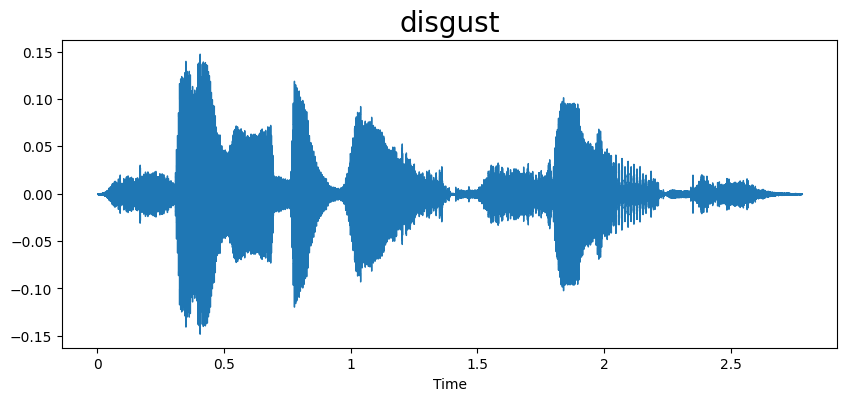

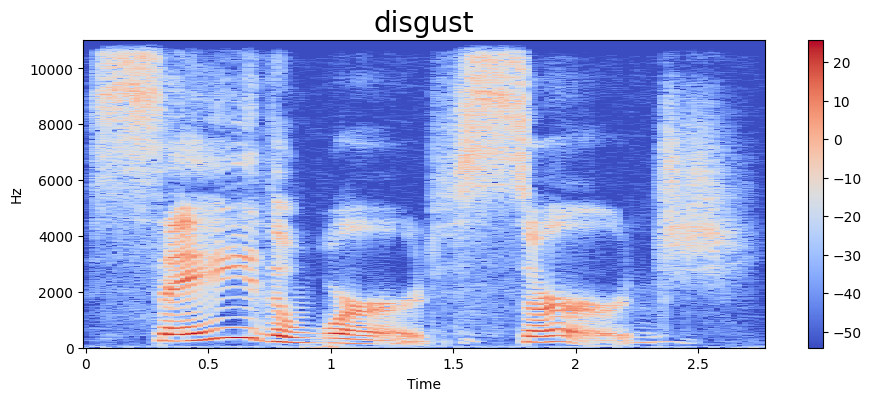

In [55]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

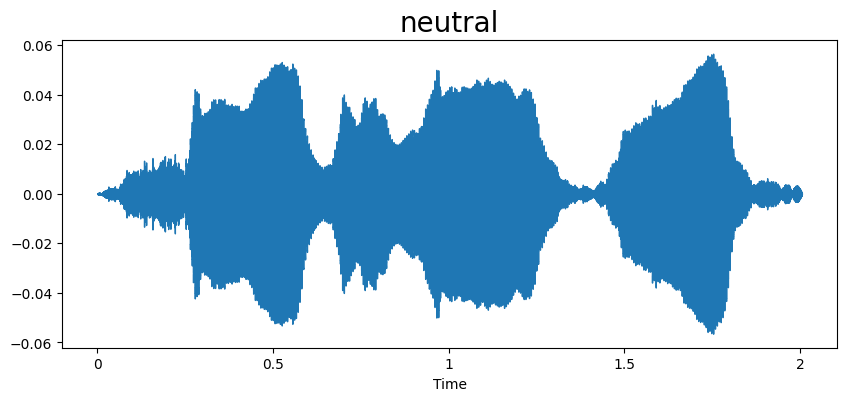

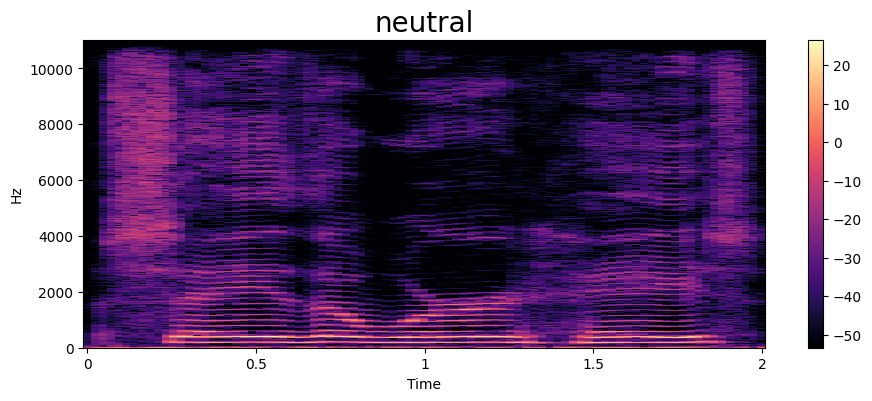

In [56]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

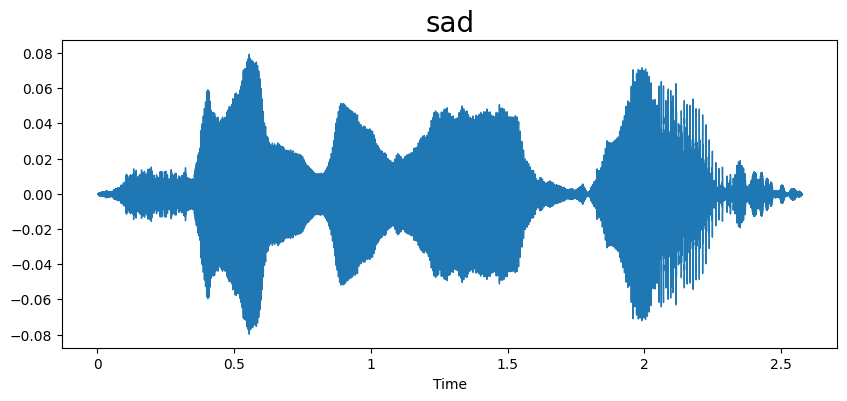

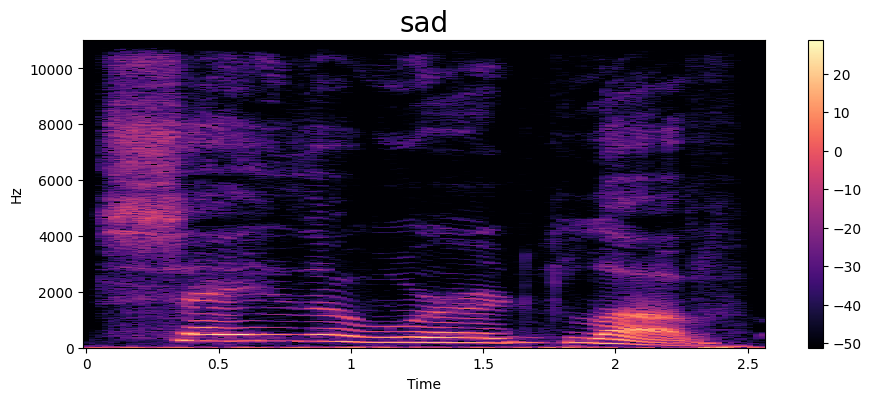

In [57]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

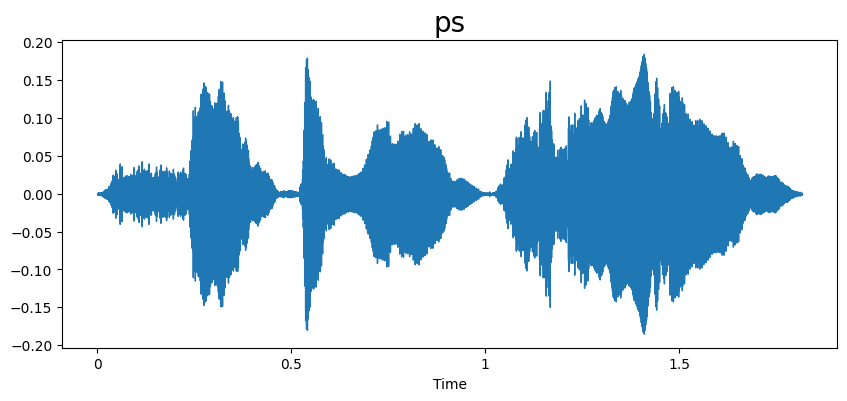

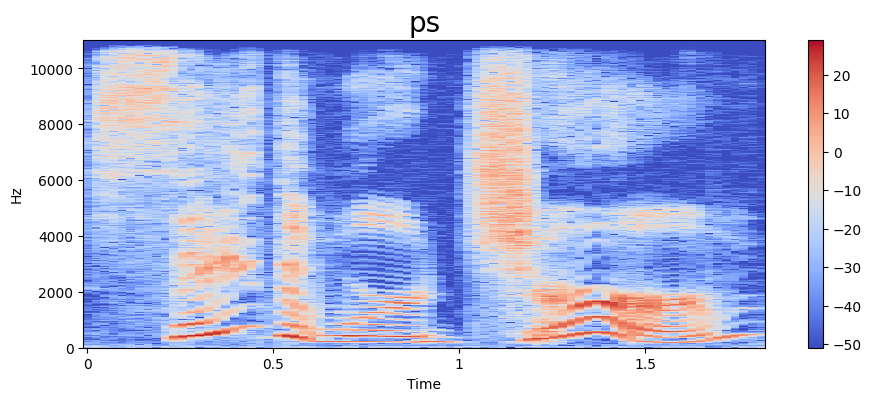

In [58]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

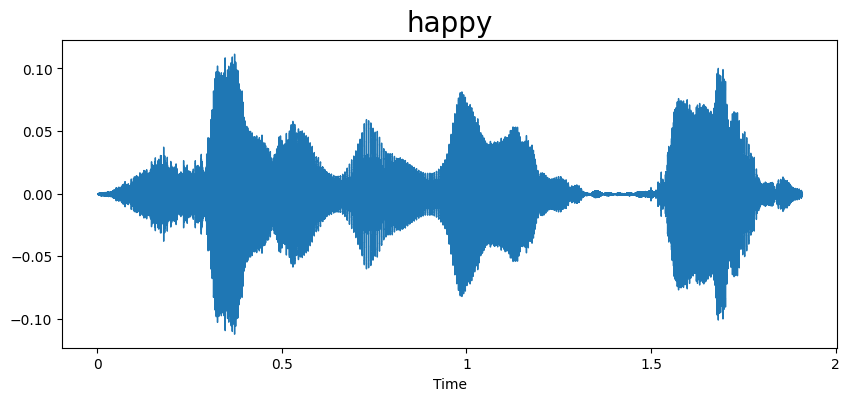

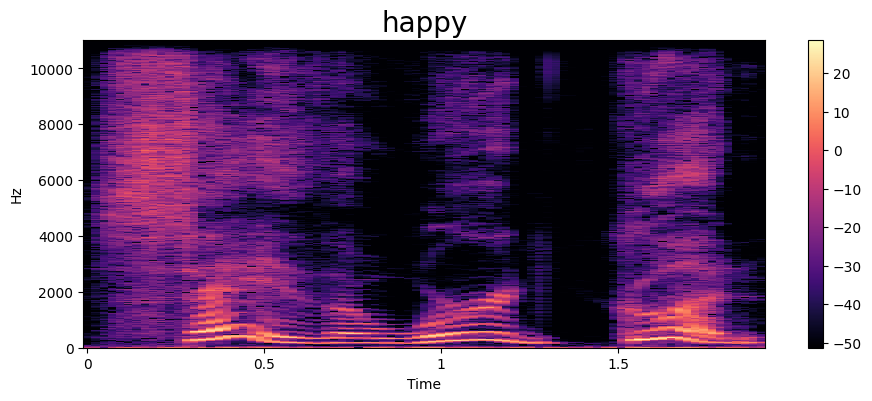

In [59]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [60]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [61]:
extract_mfcc(df['speech'][0])

array([-4.3393402e+02,  6.7451630e+01, -2.1517804e+00,  1.1692981e+01,
       -1.5818885e+01,  1.4046828e+01, -9.2367306e+00, -2.4260099e+01,
       -8.7000189e+00,  3.3297951e+00, -8.4071102e+00,  7.5846119e+00,
       -8.4333515e+00,  1.1997818e+00,  1.8338083e+00, -6.3457222e+00,
       -7.0867464e-02, -1.1797626e+00, -4.2417922e+00,  2.9687898e+00,
       -2.3588212e+00,  1.3463842e+00, -3.6910803e+00,  1.7918742e+00,
       -4.1756849e+00,  5.7115090e-01, -2.4887073e+00,  1.6613963e+00,
       -2.1691701e+00,  2.2093108e+00,  1.6968273e+00,  5.4200687e+00,
        6.9091487e-01,  3.5142210e+00,  3.6602633e+00,  1.7573073e+00,
        4.6435447e+00,  4.4019842e+00,  4.4722466e+00,  6.3975248e+00],
      dtype=float32)

In [62]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [63]:
X_mfcc

0       [-433.93402, 67.45163, -2.1517804, 11.692981, ...
1       [-419.32684, 55.51554, 6.4069505, 20.166203, -...
2       [-423.19373, 94.5416, -1.5288796, 29.158123, -...
3       [-396.72235, 101.11768, -4.979833, 13.847394, ...
4       [-418.1366, 106.31418, -5.3003545, 12.404702, ...
                              ...                        
2795    [-295.97134, 80.57479, -25.930223, -19.647778,...
2796    [-289.627, 53.460472, -32.38884, 8.953138, -3....
2797    [-324.9588, 32.13076, -16.518095, 13.54188, -2...
2798    [-338.25797, 66.80307, -30.96228, 9.010918, -4...
2799    [-288.68674, 40.154762, -14.980734, 24.782038,...
Name: speech, Length: 2800, dtype: object

In [64]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [65]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [66]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [67]:
y = y.toarray()

In [68]:
y.shape

(2800, 7)

In [69]:
#lstm model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [70]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 8s 138ms/step - loss: 1.3670 - accuracy: 0.4504 - val_loss: 0.5377 - val_accuracy: 0.7625
Epoch 2/50
35/35 [==============================] - 5s 137ms/step - loss: 0.5299 - accuracy: 0.7960 - val_loss: 0.3780 - val_accuracy: 0.8839
Epoch 3/50
35/35 [==============================] - 5s 137ms/step - loss: 0.2539 - accuracy: 0.9219 - val_loss: 0.7175 - val_accuracy: 0.7821
Epoch 4/50
35/35 [==============================] - 4s 125ms/step - loss: 0.1738 - accuracy: 0.9442 - val_loss: 0.9745 - val_accuracy: 0.7036
Epoch 5/50
35/35 [==============================] - 5s 139ms/step - loss: 0.2068 - accuracy: 0.9326 - val_loss: 0.8722 - val_accuracy: 0.7161
Epoch 6/50
35/35 [==============================] - 4s 127ms/step - loss: 0.1185 - accuracy: 0.9638 - val_loss: 0.8935 - val_accuracy: 0.7036
Epoch 7/50
35/35 [==============================] - 4s 125ms/step - loss: 0.0889 - accuracy: 0.9705 - val_loss: 1.4044 - val_accuracy: 0.5964
Epoch 

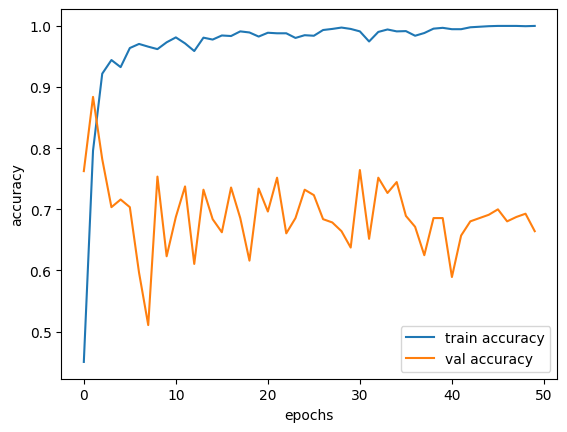

In [71]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

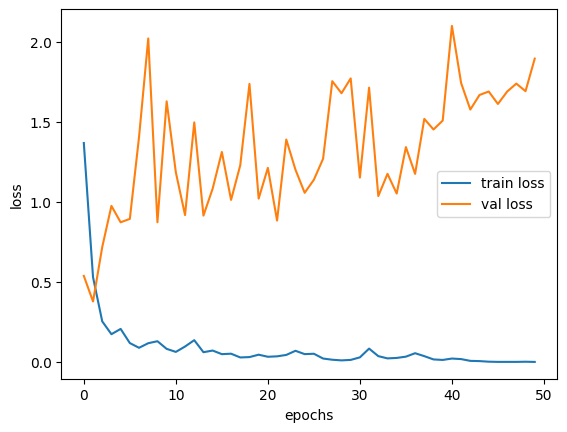

In [72]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()